In [1]:
#Realizamos los imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors


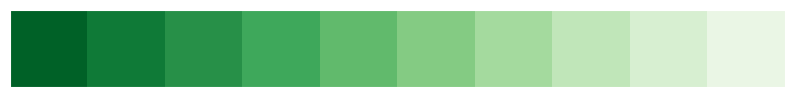

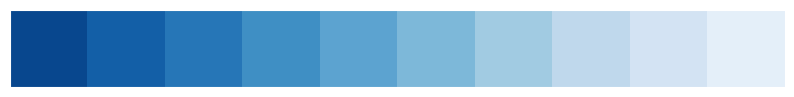

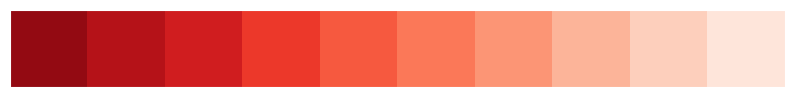

In [2]:
plt.rcParams['figure.dpi'] = 100
#plt.rcParams['figure.figsize'] = (8,12)
sns.set_style('dark')
colors_green = sns.color_palette("Greens",10)[::-1]
colors_blue = sns.color_palette("Blues",10)[::-1]
colors_red = sns.color_palette("Reds",10)[::-1]
sns.palplot(colors_green)
sns.palplot(colors_blue)
sns.palplot(colors_red)


In [4]:
#Colocamos el nombre de las universidades en dos variables
#Para una futura reutilización del codigo

university1 = 'GrupoC_jujuy_universidad'
university1_name = 'universidad nacional de jujuy'

university2 = 'GrupoC_palermo_universidad'
university2_name = 'universidad de palermo'


In [5]:
df_1 = pd.read_csv(f'../../datasets/{university1}_process.txt', sep='\t')
df_2 = pd.read_csv(f'../../datasets/{university2}_process.txt', sep='\t')


In [16]:
df_2.columns

Index(['university', 'career', 'inscription_date', 'first_name', 'gender',
       'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [6]:
df_2.columns

Index(['university', 'career', 'inscription_date', 'first_name', 'gender',
       'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [12]:
df_geonames = pd.read_csv('../AR_geonames.txt', sep='\t', header=None,on_bad_lines='skip')
df_geonames

,0,1,2,3,4,5,6,7,8,9,10,11
0,AR,3636,"POZO CERCADO (EL CHORRO (F), DPTO. RIVADAVIA (S))",Salta,A,NaN,NaN,NaN,NaN,-23.4933,-61.9267,3
1,AR,4123,LAS SALADAS,Salta,A,NaN,NaN,NaN,NaN,-25.7833,-64.5000,4
2,AR,4126,BRETE,Salta,A,NaN,NaN,NaN,NaN,-26.0667,-65.3667,4
3,AR,4126,CEIBAL,Salta,A,NaN,NaN,NaN,NaN,-26.1000,-65.0167,4
4,AR,4126,RUIZ DE LOS LLANOS,Salta,A,NaN,NaN,NaN,NaN,-26.1167,-65.2833,4
...,...,...,...,...,...,...,...,...,...,...,...,...
20255,AR,9407,RINCON DE LOS MORROS,Santa Cruz,Z,NaN,NaN,NaN,NaN,-51.7083,-72.0375,3
20256,AR,9407,28 DE NOVIEMBRE,Santa Cruz,Z,NaN,NaN,NaN,NaN,-51.6500,-72.3000,4
20257,AR,9407,GAYPON,Santa Cruz,Z,NaN,NaN,NaN,NaN,-51.9667,-71.4667,4
20258,AR,9407,EL TURBIO,Santa Cruz,Z,NaN,NaN,NaN,NaN,-51.6833,-72.0833,4


In [14]:
df_geonames.dropna(axis=1, inplace=True)
df_geonames

,0,1,2,3,4,9,10,11
0,AR,3636,"POZO CERCADO (EL CHORRO (F), DPTO. RIVADAVIA (S))",Salta,A,-23.4933,-61.9267,3
1,AR,4123,LAS SALADAS,Salta,A,-25.7833,-64.5000,4
2,AR,4126,BRETE,Salta,A,-26.0667,-65.3667,4
3,AR,4126,CEIBAL,Salta,A,-26.1000,-65.0167,4
4,AR,4126,RUIZ DE LOS LLANOS,Salta,A,-26.1167,-65.2833,4
...,...,...,...,...,...,...,...,...
20255,AR,9407,RINCON DE LOS MORROS,Santa Cruz,Z,-51.7083,-72.0375,3
20256,AR,9407,28 DE NOVIEMBRE,Santa Cruz,Z,-51.6500,-72.3000,4
20257,AR,9407,GAYPON,Santa Cruz,Z,-51.9667,-71.4667,4
20258,AR,9407,EL TURBIO,Santa Cruz,Z,-51.6833,-72.0833,4


In [15]:
df_geonames.columns = ['country','postal_code', 'location', 'region', 'type', 'lat', 'lon', 'type_2']

In [17]:
df_1geonames_merge = df_geonames.merge(df_1, on='postal_code', how='right')

In [18]:
df_1geonames_merge

,country,postal_code,location_x,region,type,lat,lon,type_2,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,8521,BALNEARIO LAS GRUTAS,Rio Negro,R,-41.6167,-66.2333,3.0,universidad nacional de jujuy,licenciatura en musicoterapia,2020-11-27,megan lopez,NaN,female,55,arroyo de la ventana,reeddonald@yahoo.com
1,AR,8521,ARROYO TEMBRADO,Rio Negro,R,-41.6167,-66.2333,3.0,universidad nacional de jujuy,licenciatura en musicoterapia,2020-11-27,megan lopez,NaN,female,55,arroyo de la ventana,reeddonald@yahoo.com
2,AR,8521,SIERRA DE LA VENTANA,Rio Negro,R,-41.6167,-66.2333,3.0,universidad nacional de jujuy,licenciatura en musicoterapia,2020-11-27,megan lopez,NaN,female,55,arroyo de la ventana,reeddonald@yahoo.com
3,AR,8521,SIERRA PAILEMAN,Rio Negro,R,-41.1500,-65.9333,4.0,universidad nacional de jujuy,licenciatura en musicoterapia,2020-11-27,megan lopez,NaN,female,55,arroyo de la ventana,reeddonald@yahoo.com
4,AR,8521,CONA NIYEU,Rio Negro,R,-41.8833,-67.0000,4.0,universidad nacional de jujuy,licenciatura en musicoterapia,2020-11-27,megan lopez,NaN,female,55,arroyo de la ventana,reeddonald@yahoo.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19361,AR,5325,LOROHUASI,La Rioja,F,-28.3167,-67.0500,3.0,universidad nacional de jujuy,agronomía,2020-10-05,amanda miller,NaN,female,85,alpasinche,smithjames@gmail.com
19362,AR,5325,EL RETIRO,La Rioja,F,-28.3167,-67.0500,3.0,universidad nacional de jujuy,agronomía,2020-10-05,amanda miller,NaN,female,85,alpasinche,smithjames@gmail.com
19363,AR,5325,LA PIRGUA,La Rioja,F,-28.3167,-67.0500,3.0,universidad nacional de jujuy,agronomía,2020-10-05,amanda miller,NaN,female,85,alpasinche,smithjames@gmail.com
19364,AR,6472,FRANCISCO MADERO,Buenos Aires,B,-35.8667,-62.0500,4.0,universidad nacional de jujuy,agronomía,2020-10-25,chelsey melton,NaN,female,44,francisco madero,erin59@gmail.com


In [19]:
df_2geonames_merge = df_geonames.merge(df_2, on='postal_code', how='right')



**TOP 10 de carreras con más alumnos y con menos alumnos**


Text(0, 0.5, 'Carrera')

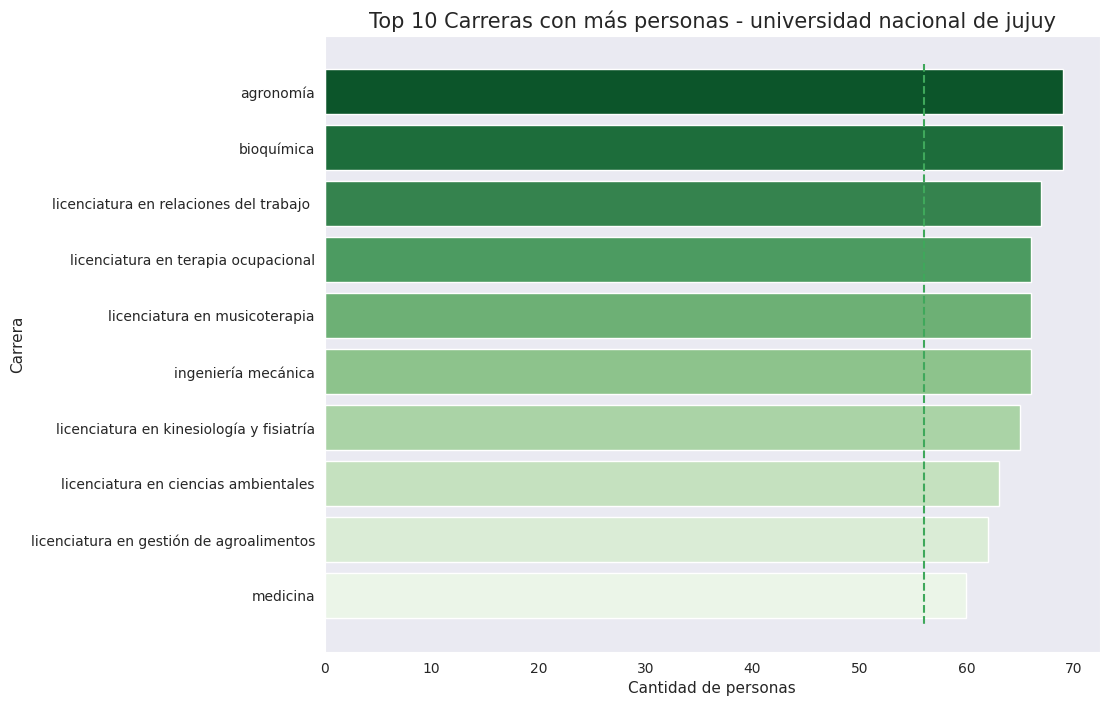

<Figure size 1000x800 with 0 Axes>

In [20]:


df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))


plt.figure(figsize=(10, 8))


sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university1_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

/tmp/ipykernel_11331/497808238.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


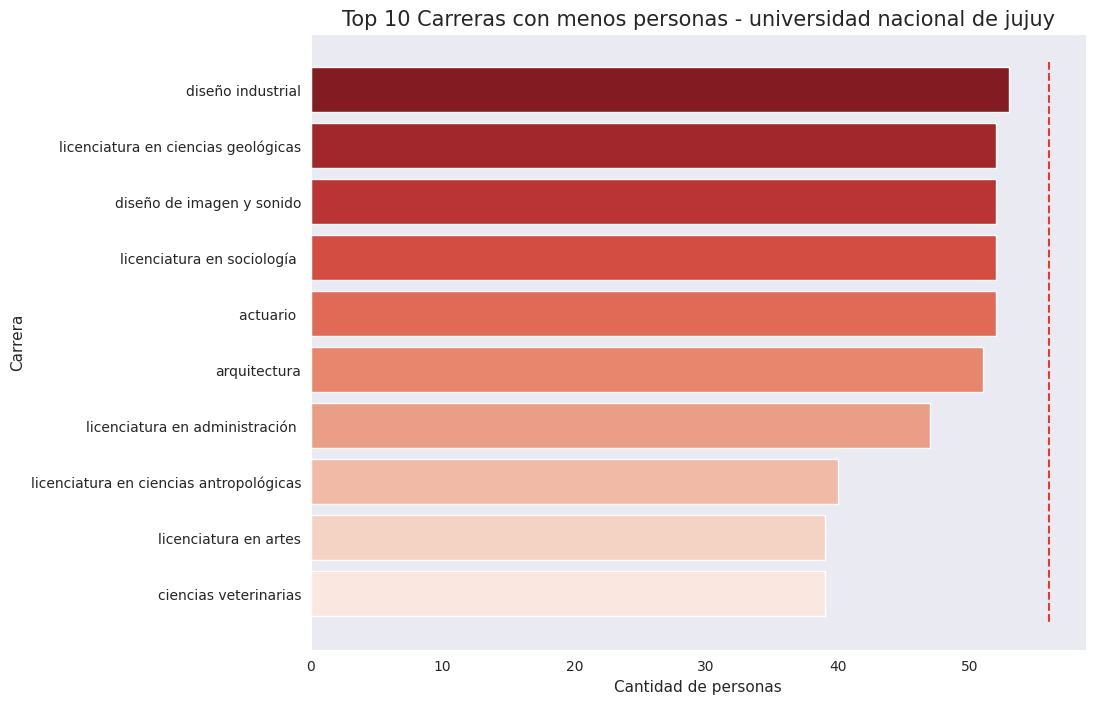

In [22]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university1_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

fig.show()

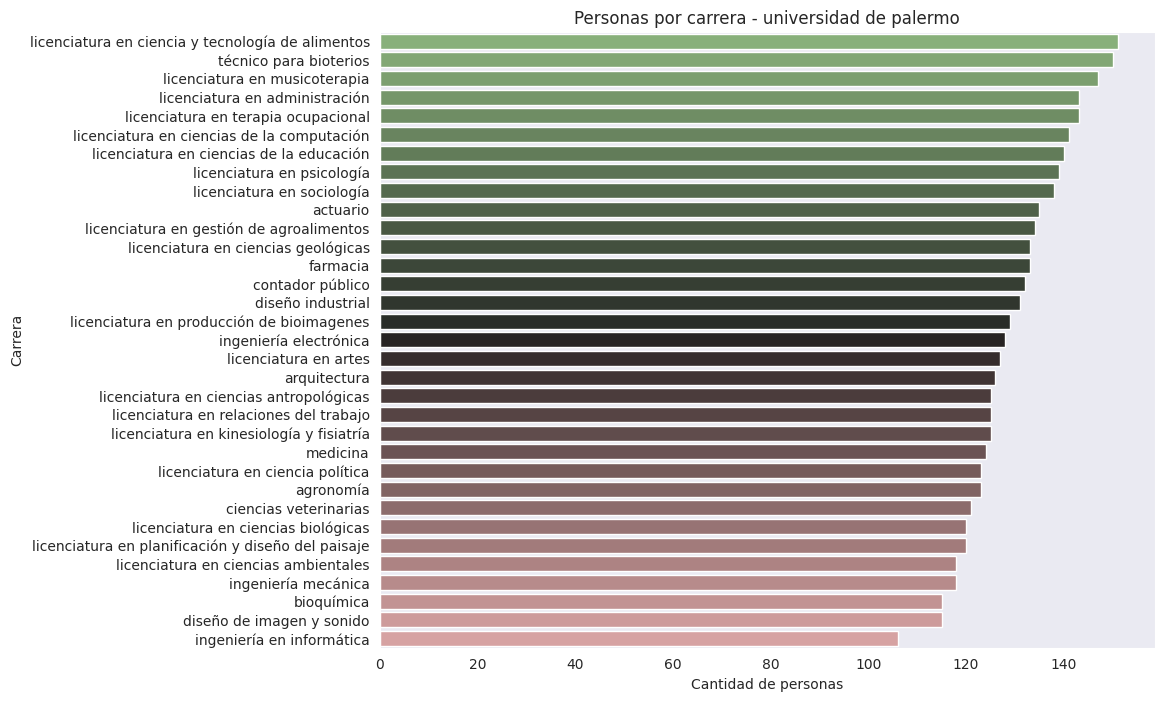

In [23]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university2_name}')
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

/tmp/ipykernel_11331/250912100.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


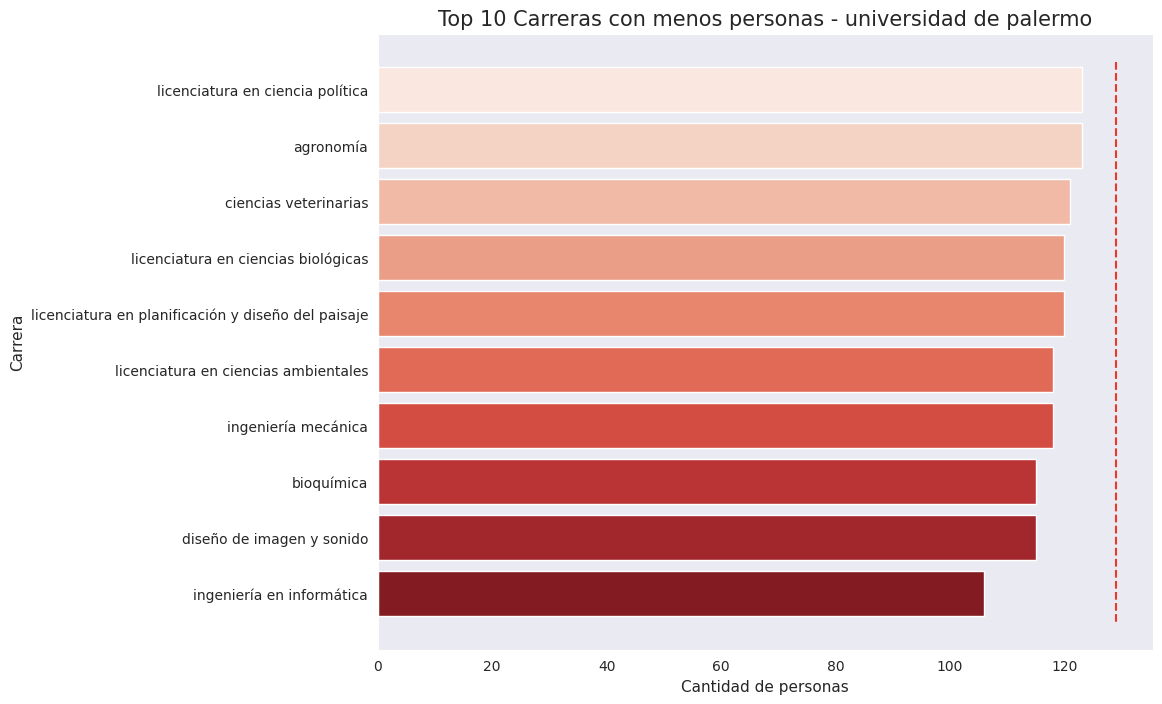

In [24]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university2_name}',{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

fig.show()

In [25]:
df_1.head()

,university,career,inscription_date,first_name,last_name,gender,age,postal_code,location,email
0,universidad nacional de jujuy,licenciatura en musicoterapia,2020-11-27,megan lopez,NaN,female,55,8521,arroyo de la ventana,reeddonald@yahoo.com
1,universidad nacional de jujuy,diseño industrial,2020-11-01,corey alvarado,NaN,male,11,7406,aldecon,shawnhunt@gmail.com
2,universidad nacional de jujuy,licenciatura en ciencias ambientales,2020-10-24,jessica jordan,NaN,female,77,3586,campo yaguarete,daymatthew@gmail.com
3,universidad nacional de jujuy,contador público,2020-11-23,heather williams,NaN,female,89,9031,bajo la cancha,travissutton@yahoo.com
4,universidad nacional de jujuy,diseño de imagen y sonido,2020-09-22,jose jones,NaN,male,18,5329,amuschina,jennifer87@hotmail.com


<AxesSubplot: xlabel='gender', ylabel='age'>

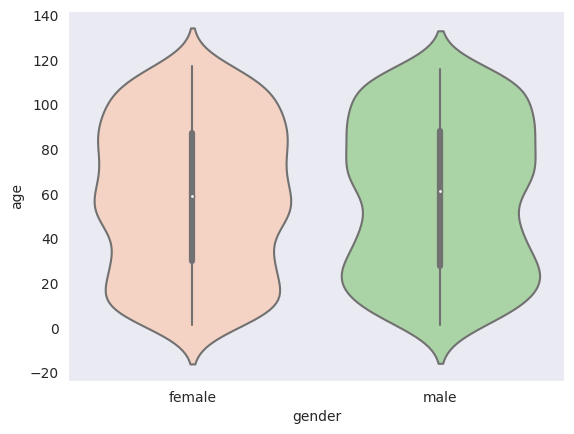

In [86]:
sns.violinplot(data=df_1,y='age', x='gender', palette=[colors_red[8], colors_green[6]])

<AxesSubplot: xlabel='gender', ylabel='age'>

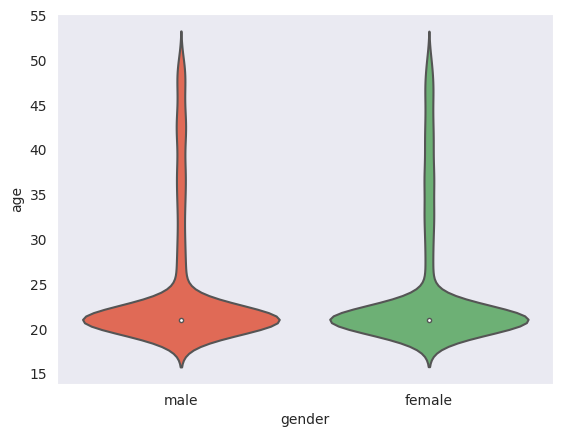

In [30]:
sns.violinplot(data=df_2,y='age', x='gender', palette=[colors_red[4], colors_green[4]])

,university,career,inscription_date,first_name,gender,age,postal_code,location,email
3,universidad de palermo,técnico para bioterios,2021-01-26,stephanie dean,female,42,2846,ANAHI,zcampbell@gmail.com
4,universidad de palermo,licenciatura en administración,2021-01-13,anthony garcia,male,42,2846,ANAHI,boothchristopher@gmail.com
6,universidad de palermo,contador público,2021-01-08,david hess,male,32,1759,GONZALEZ CATAN,martinezbrooke@yahoo.com
8,universidad de palermo,arquitectura,2021-01-28,cynthia miller,female,43,1759,GONZALEZ CATAN,beckersteven@gmail.com
12,universidad de palermo,bioquímica,2021-01-30,brenda johnson,female,41,5263,EL MEDANO,dustin62@hotmail.com
...,...,...,...,...,...,...,...,...,...
4267,universidad de palermo,licenciatura en kinesiología y fisiatría,2021-01-17,maria gonzalez,female,33,9410,BAHIA LAPATAIA,carterashley@yahoo.com
4268,universidad de palermo,arquitectura,2021-01-03,richard cruz,male,43,2208,GABOTO,moyerpaul@hotmail.com
4271,universidad de palermo,licenciatura en planificación y diseño del pai...,2021-01-16,rebecca cunningham,female,30,7208,CORONEL BOERR,teaton@yahoo.com
4274,universidad de palermo,contador público,2021-01-20,mark strickland,male,37,1702,CIUDADELA,bthompson@yahoo.com


### top 10 localidades por alumnos


In [27]:
df_1.location.value_counts().head(10)

bella vista       9
arroyo grande     9
25 de mayo        8
agua colorada     7
alamos            6
9 de julio        6
acheral           6
general conesa    6
la colina         6
baigorrita        5
Name: location, dtype: int64

In [28]:
df_2.location.value_counts().head(10)

CHEROGUITA          10
CALERA ARGENTINA    10
ALABAMA              9
LEUBUCO              9
BOCAYUBA             9
ALZAGA               9
OCHENTA Y CUATRO     8
EL BOMBERO           8
AURELIA              8
BOLIVAR              8
Name: location, dtype: int64

**Distribucion de alumnos por edad y género**

<AxesSubplot: xlabel='age', ylabel='Density'>

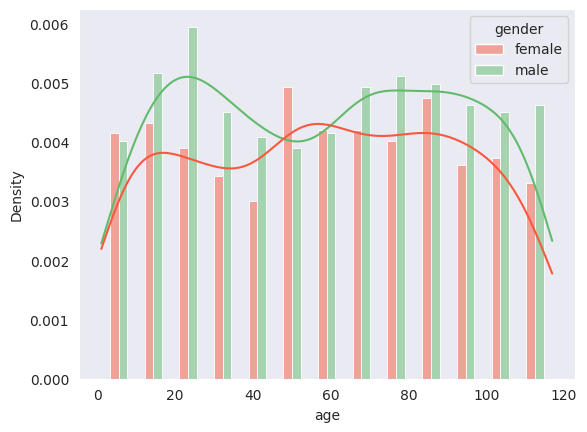

In [29]:
sns.histplot(data=df_1,x='age', hue='gender', kde=True,fill=True,multiple='dodge', shrink=.5,stat='density', palette=[colors_red[4], colors_green[4]])


<AxesSubplot: xlabel='age', ylabel='Density'>

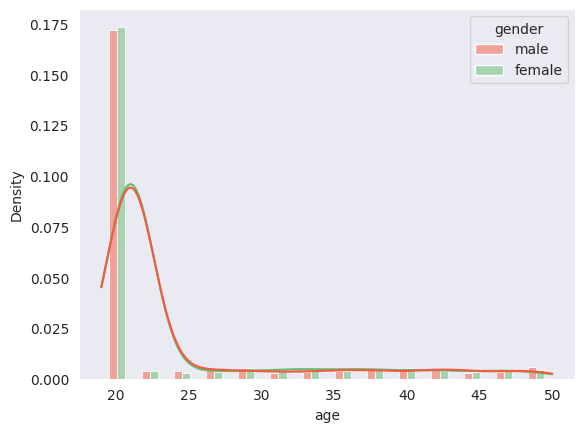

In [31]:
sns.histplot(data=df_2,x='age', hue='gender', kde=True,fill=True,multiple='dodge', shrink=.5,stat='density', palette=[colors_red[4], colors_green[4]])


In [32]:
df_1.inscription_date = pd.to_datetime(df_1.inscription_date)
df_2.inscription_date = pd.to_datetime(df_2.inscription_date)


Segregación por tipo de carrera


In [33]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','licenciatura en ciencias biológicas','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 
    'técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'ciencias_salud':['ciencias veterinarias','farmacia','licenciatura en kinesiología y fisiatría','licenciatura en producción de bioimagenes','medicina','licenciatura en gestión de agroalimentos', 'licenciatura en ciencia y tecnología de alimentos','bioquímica'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia', ],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    elif x in clasificador['ciencias_salud']:
        return "Salud"
    else:
        return "Sociales"
df_1['tipo_career'] = df_1.career.apply(clasificador)

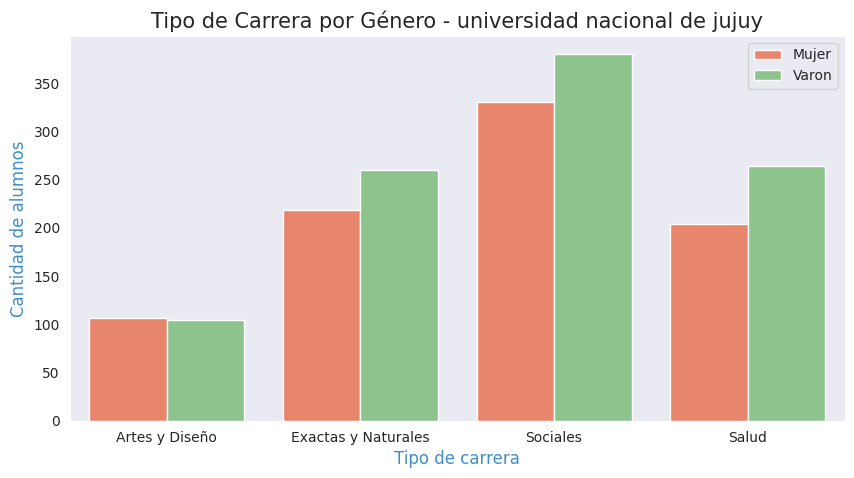

In [35]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_1,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university1_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_blue[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_blue[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])


/tmp/ipykernel_11331/2202455473.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


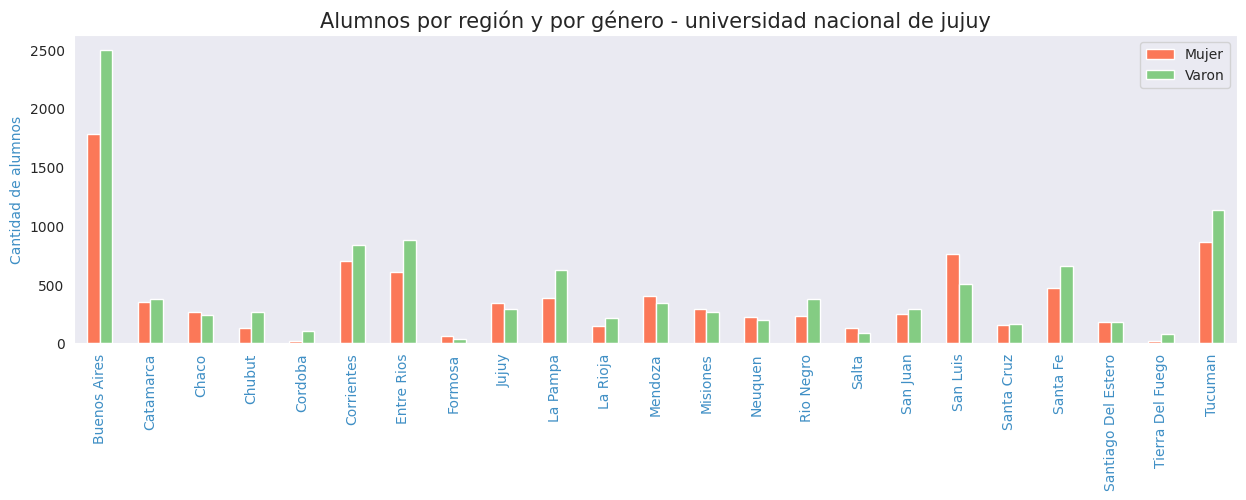

In [37]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_1geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'}
)
df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university1_name}',{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_blue[3]})
ax.tick_params(axis='x', colors=colors_blue[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
fig.show()


In [39]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','licenciatura en ciencias biológicas','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 
    'técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'ciencias_salud':['ciencias veterinarias','farmacia','licenciatura en kinesiología y fisiatría','licenciatura en producción de bioimagenes','medicina','licenciatura en gestión de agroalimentos', 'licenciatura en ciencia y tecnología de alimentos','bioquímica'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia', ],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    elif x in clasificador['ciencias_salud']:
        return "Salud"
    else:
        return "Sociales"
df_2['tipo_career'] = df_2.career.apply(clasificador)

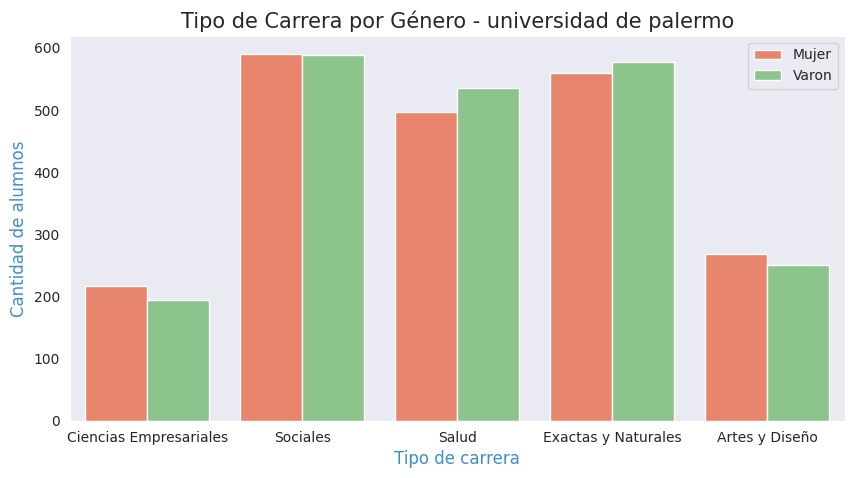

In [41]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_2,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university2_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_blue[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_blue[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])

/tmp/ipykernel_11331/3203588924.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


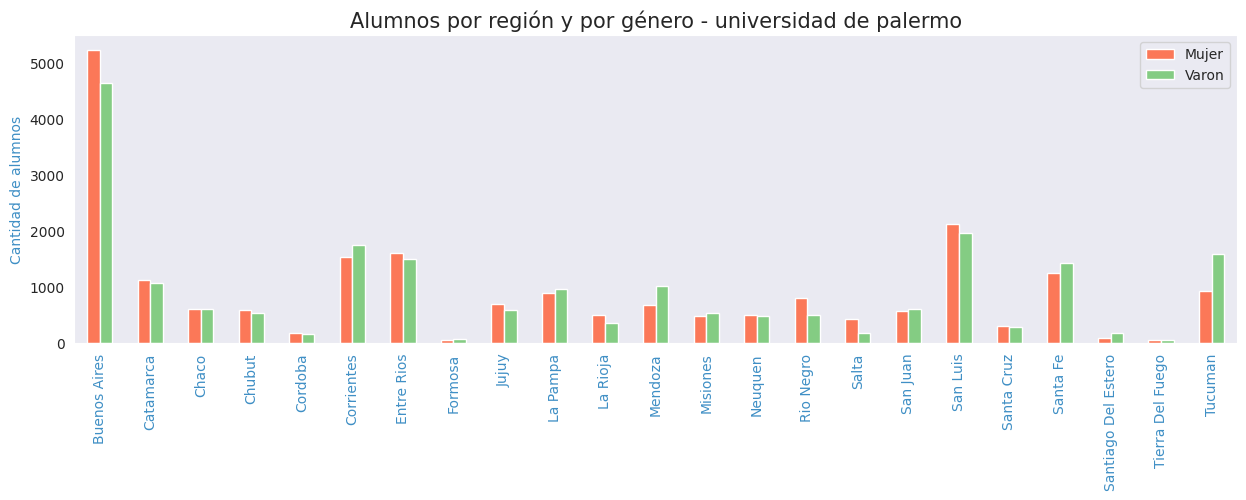

In [42]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_2geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'}
)
df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university2_name}',{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_blue[3]})
ax.tick_params(axis='x', colors=colors_blue[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
fig.show()

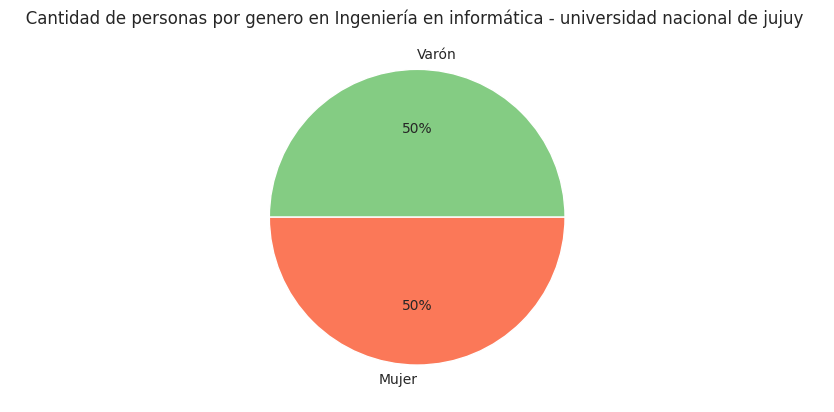

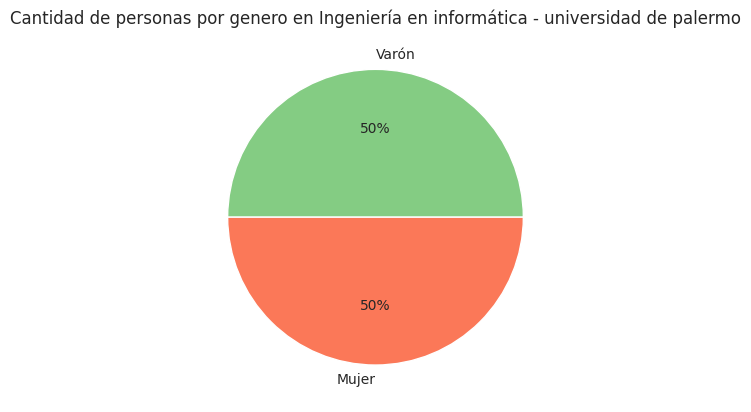

In [43]:
career = 'ingeniería en informática'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

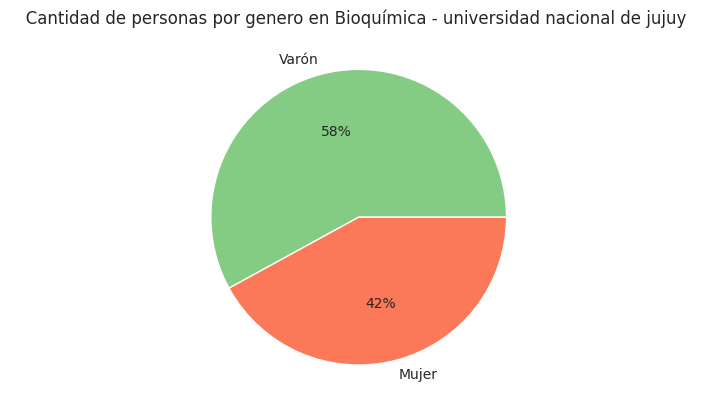

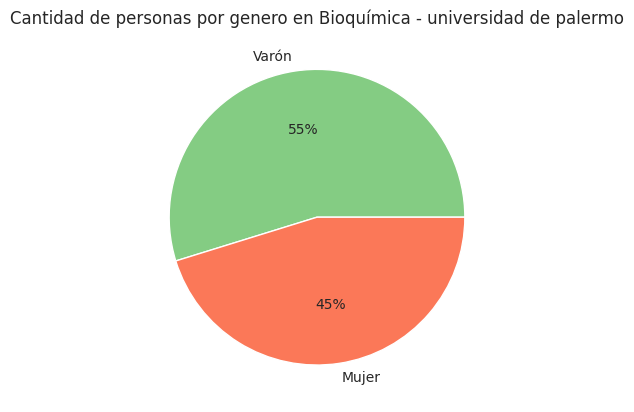

In [44]:
career = 'bioquímica'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()


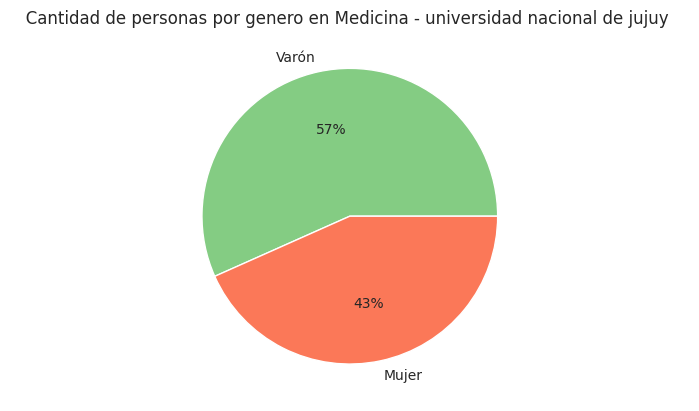

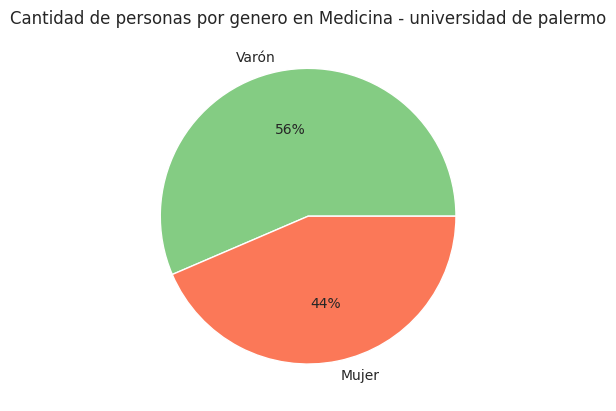

In [45]:
career = 'medicina'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()